In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data

In [2]:
df = pd.read_csv('data/DadosFinaisEnrich.csv')

cols = df.columns.to_list()
cols.remove('NO_MUNICIPIO')
# df.fillna(df.mean(), inplace=True)

df[cols] = (df[cols]-df[cols].min())/(df[cols].max()-df[cols].min())

df.head()

,NO_MUNICIPIO,IN_SALA_DIRETORIA_1,IN_INTERNET_1,IN_REDES_SOCIAIS_1,IN_NOTURNO_1,IN_EJA_1,IN_SECRETARIA_1,IN_EQUIP_LOUSA_DIGITAL_1,IN_SALA_PROFESSOR_1,IN_AREA_VERDE_1,...,IDEB_anos_finais_ef,idhm,pib_per_capta,mortalidade_infantil,esgotamento_sanitario_adequado,sus_hab,perc_populacao_exposta_risco,escolas_hab,homicidios_hab,furtos_hab
0,Adamantina,0.800000,0.800000,0.266667,0.066667,0.066667,0.733333,0.066667,0.666667,0.133333,...,0.482759,0.677130,0.058034,0.007431,0.943472,0.128150,0.000000,0.111096,0.069610,0.060117
1,Adolfo,1.000000,0.666667,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.379310,0.408072,0.055332,NaN,0.920592,0.165963,0.000000,0.250082,0.000000,0.190939
2,Aguaí,0.823529,0.882353,0.588235,0.058824,0.058824,0.882353,0.411765,0.823529,0.058824,...,0.482759,0.340807,0.048151,0.062845,0.866756,0.195378,0.000000,0.122025,0.099254,0.106902
3,Águas da Prata,0.500000,0.833333,0.000000,0.000000,0.000000,0.333333,0.666667,0.666667,0.000000,...,0.724138,0.636771,0.030499,NaN,0.791386,0.306127,0.000000,0.210314,0.000000,0.065585
4,Águas de Lindóia,0.266667,0.466667,0.200000,0.066667,0.066667,0.400000,0.000000,0.533333,0.066667,...,0.482759,0.475336,0.048476,0.017410,0.904441,0.300470,0.433486,0.232542,0.000000,0.126527


# 2. Analysis

The dataset counts with high dimensionality. This fact may denote that some variables may be highly correlated, and does not add information to the problem

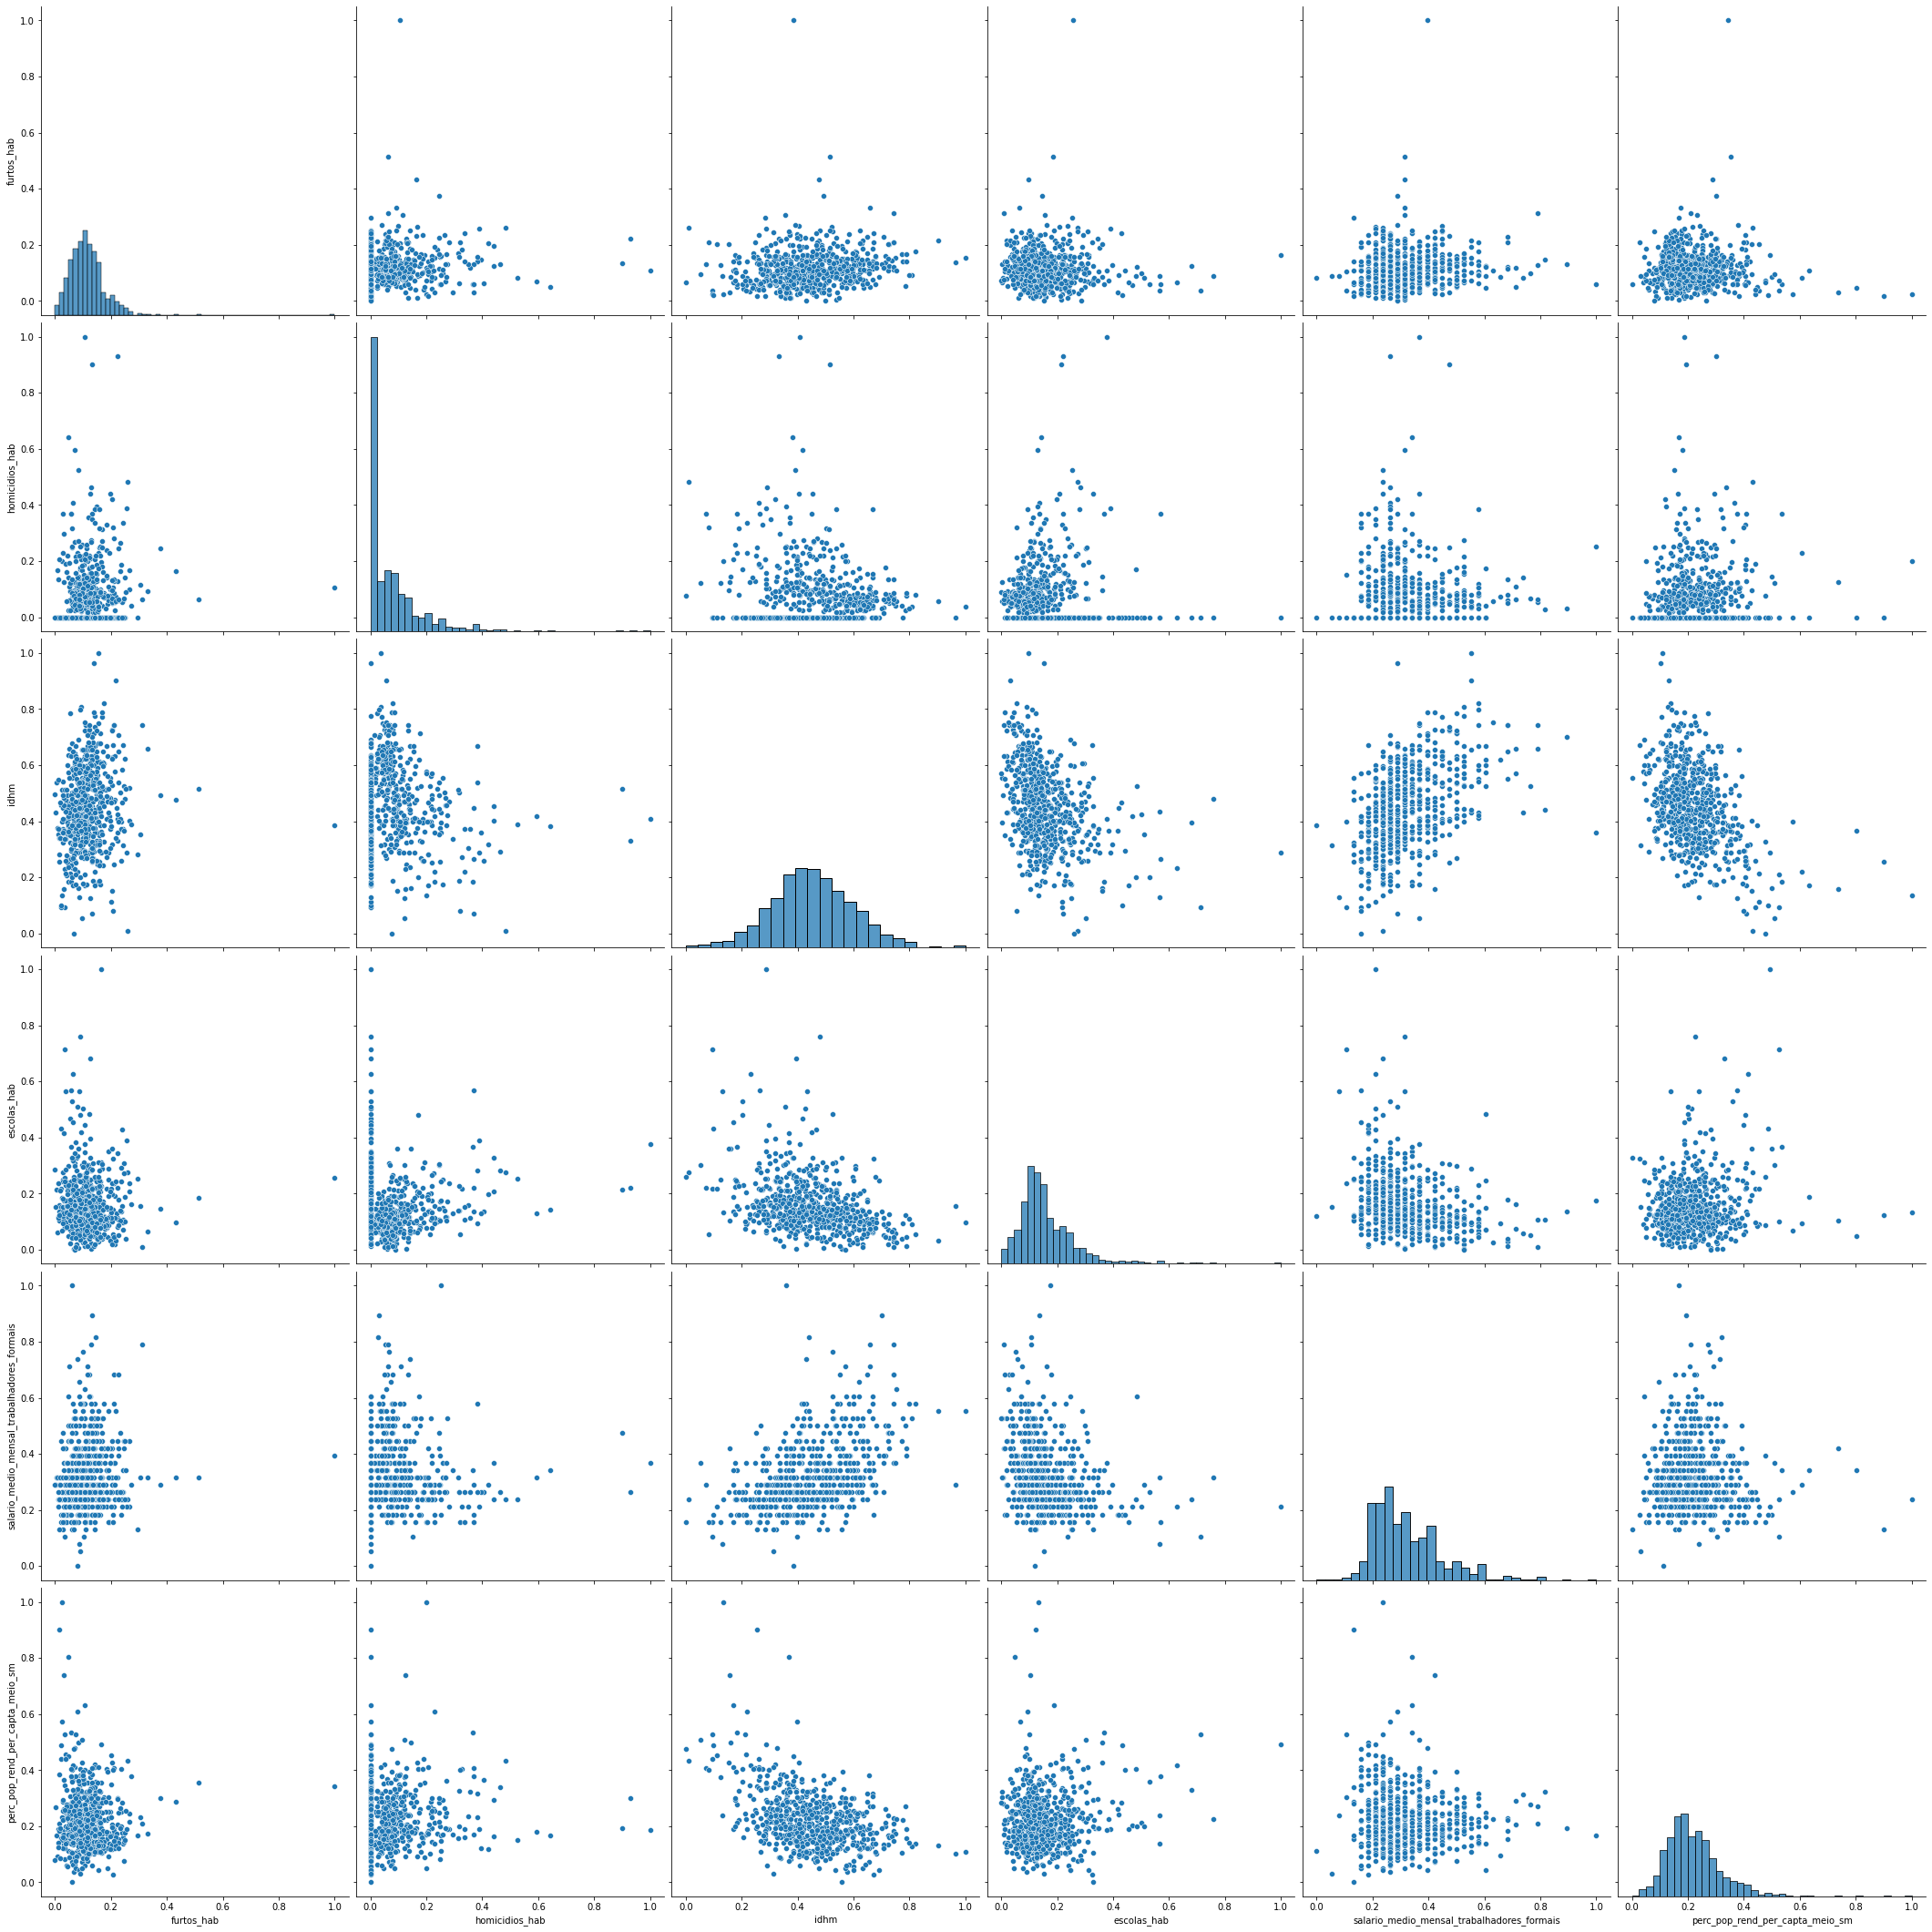

In [3]:
sns.pairplot(df[['furtos_hab', 'homicidios_hab', 'idhm', 'escolas_hab', 'salario_medio_mensal_trabalhadores_formais', 'perc_pop_rend_per_capta_meio_sm']], height=5, aspect=1)

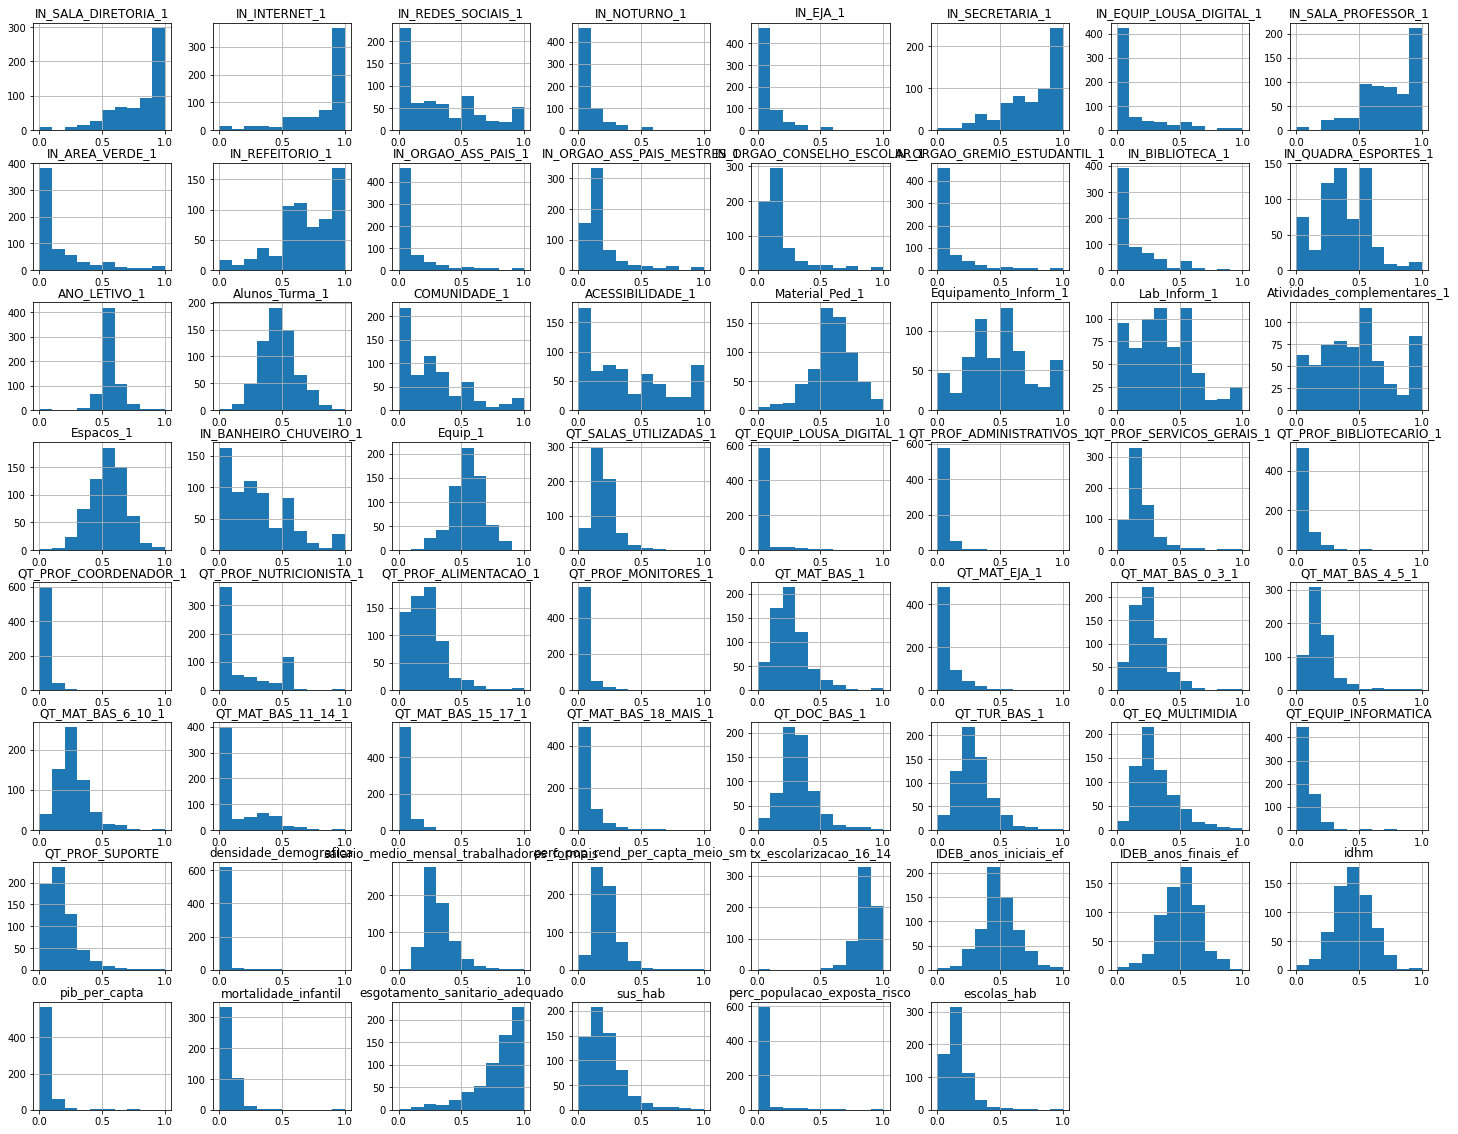

In [4]:
cols = df.columns.to_list()
cols.remove('NO_MUNICIPIO')
cols.remove('furtos_hab')
cols.remove('homicidios_hab')
cols.remove('Furto')
cols.remove('Homicidios')
cols.remove('nEscolas')
cols.remove('populacao_estimada')

df_hist = df[cols].hist(figsize=(25, 20))


<AxesSubplot:>

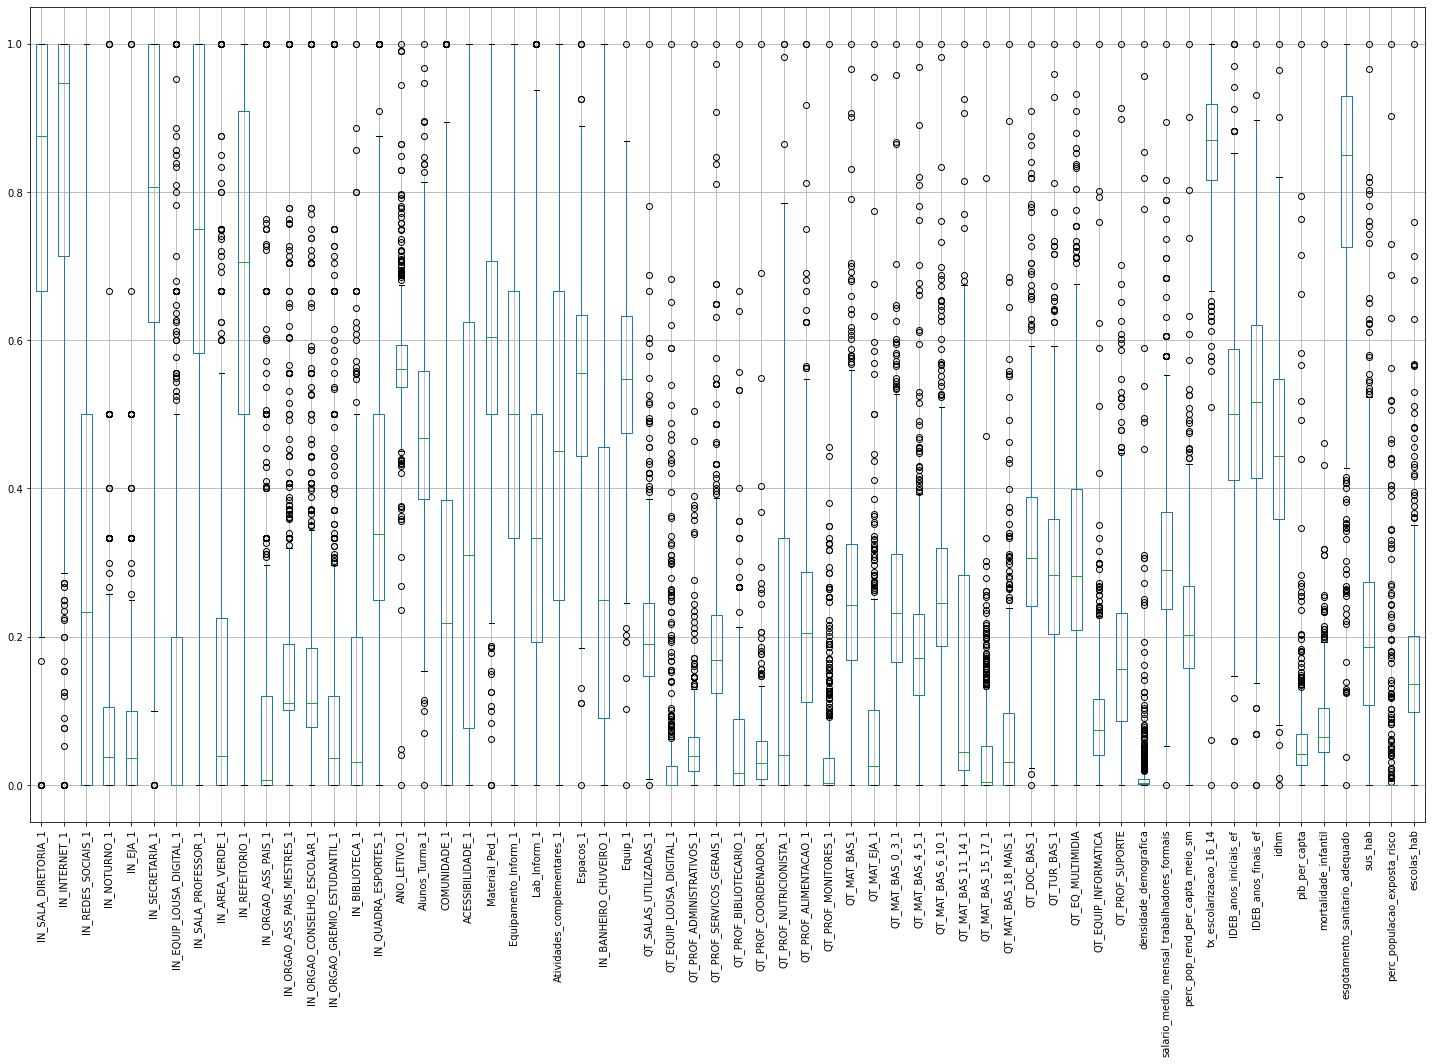

In [5]:
cols = df.columns.to_list()
cols.remove('NO_MUNICIPIO')
cols.remove('furtos_hab')
cols.remove('homicidios_hab')
cols.remove('Furto')
cols.remove('Homicidios')
cols.remove('nEscolas')
cols.remove('populacao_estimada')
# print(len(cols))

# fig, axes = plt.subplots(nrows=7, ncols=1)

# df[cols[0:10]].boxplot(rot=90, ax=axes[0])
# df[cols[10:20]].boxplot(rot=90, ax=axes[1])

df[cols].boxplot(rot=90, figsize=(25, 15))

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
LF = Q1 - 1.5*IQR
UF = Q3 + 1.5*IQR

cols_norm = ['Atividades_complementares_1', 'IN_QUADRA_ESPORTES_1', 'Equipamento_Inform_1', 'Material_Ped_1', 'Alunos_Turma_1', 'ANO_LETIVO_1', 'Espacos_1', 'Equip_1', 'QT_MAT_BAS_6_10_1',
            'QT_TUR_BAS_1', 'idhm', 'IDEB_anos_finais_ef', 'IDEB_anos_iniciais_ef', ]
cols_iqr = [el for el in cols if el not in cols_norm]

df_qt_outliers = ((df < LF) | (df > UF)).sum()

df[cols_iqr] = df[cols_iqr][(df[cols_iqr] < LF) | (df[cols_iqr] < UF)]

ub = df[cols_norm].mean() + 3 * df[cols_norm].std()
lb = df[cols_norm].mean() - 3 * df[cols_norm].std()

df[cols_norm] = df[cols_norm][(df[cols_norm] < lb) | (df[cols_norm] < ub)]

cols_drop = ['QT_EQUIP_LOUSA_DIGITAL_1', 'perc_populacao_exposta_risco']

df.drop(cols_drop, axis=1, inplace=True)
df.fillna(df.mean(), inplace=True)

# df_hist = df[cols_norm].hist()

# df[cols] = df[cols][(df > LF) & (df < UF)]
# df[(df < LF) | (df < UF)]

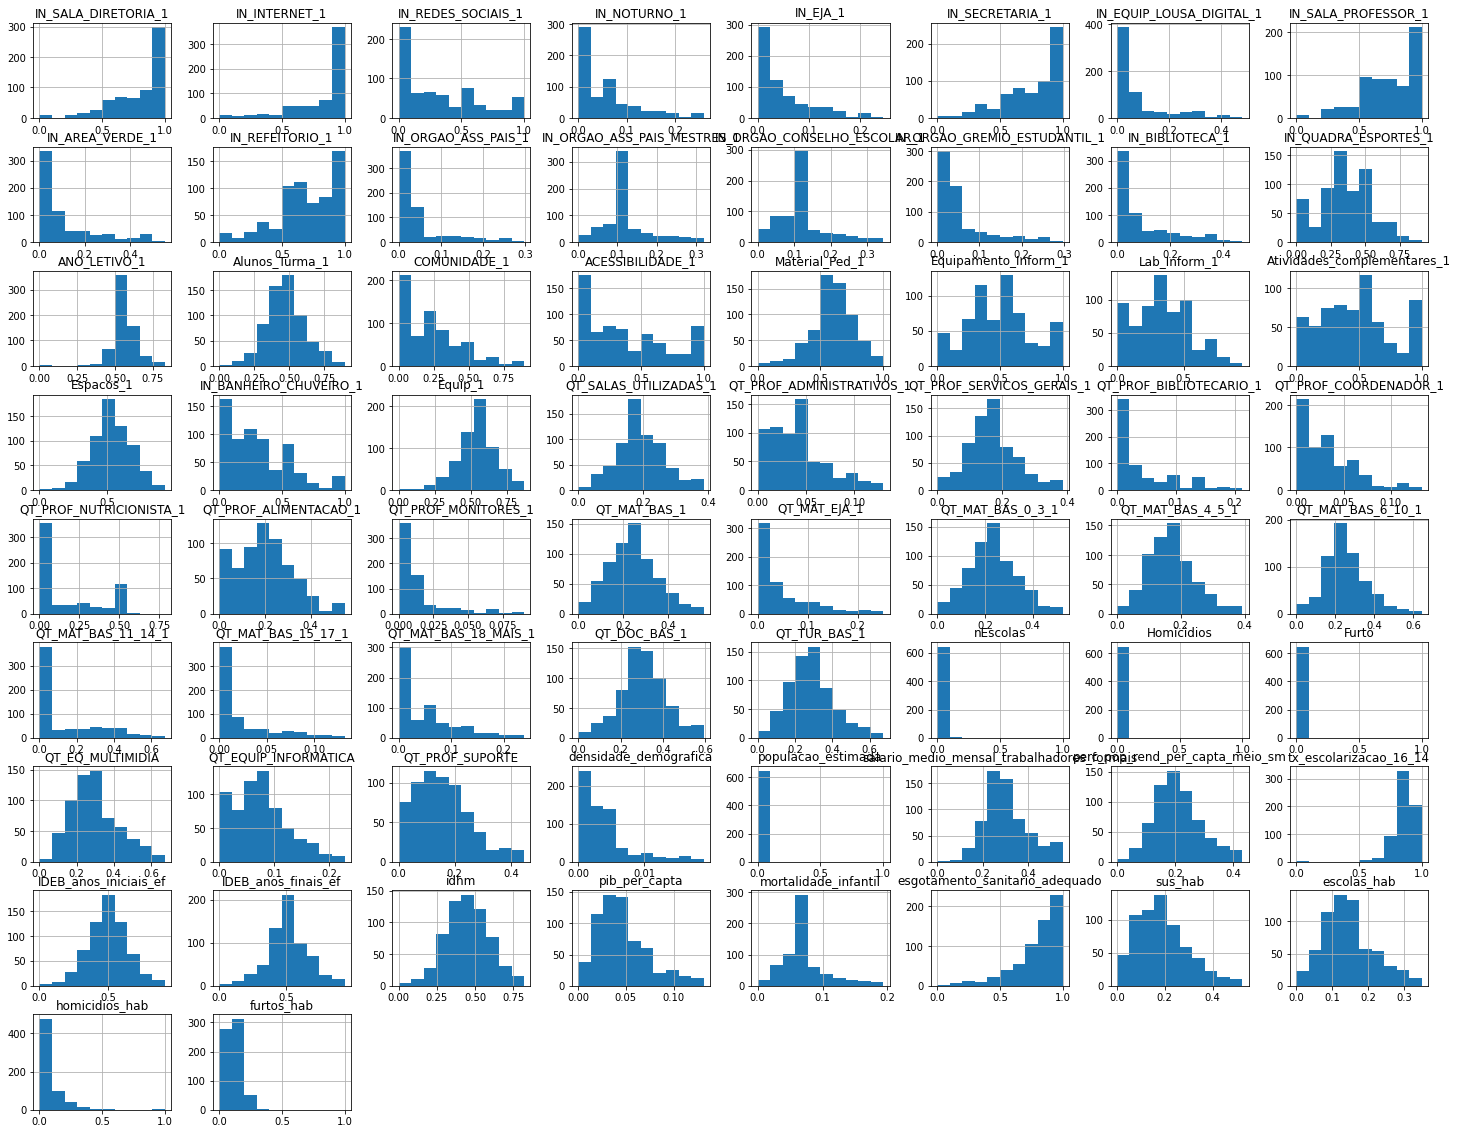

In [7]:
df_hist = df.hist(figsize=(25, 20))

<AxesSubplot:>

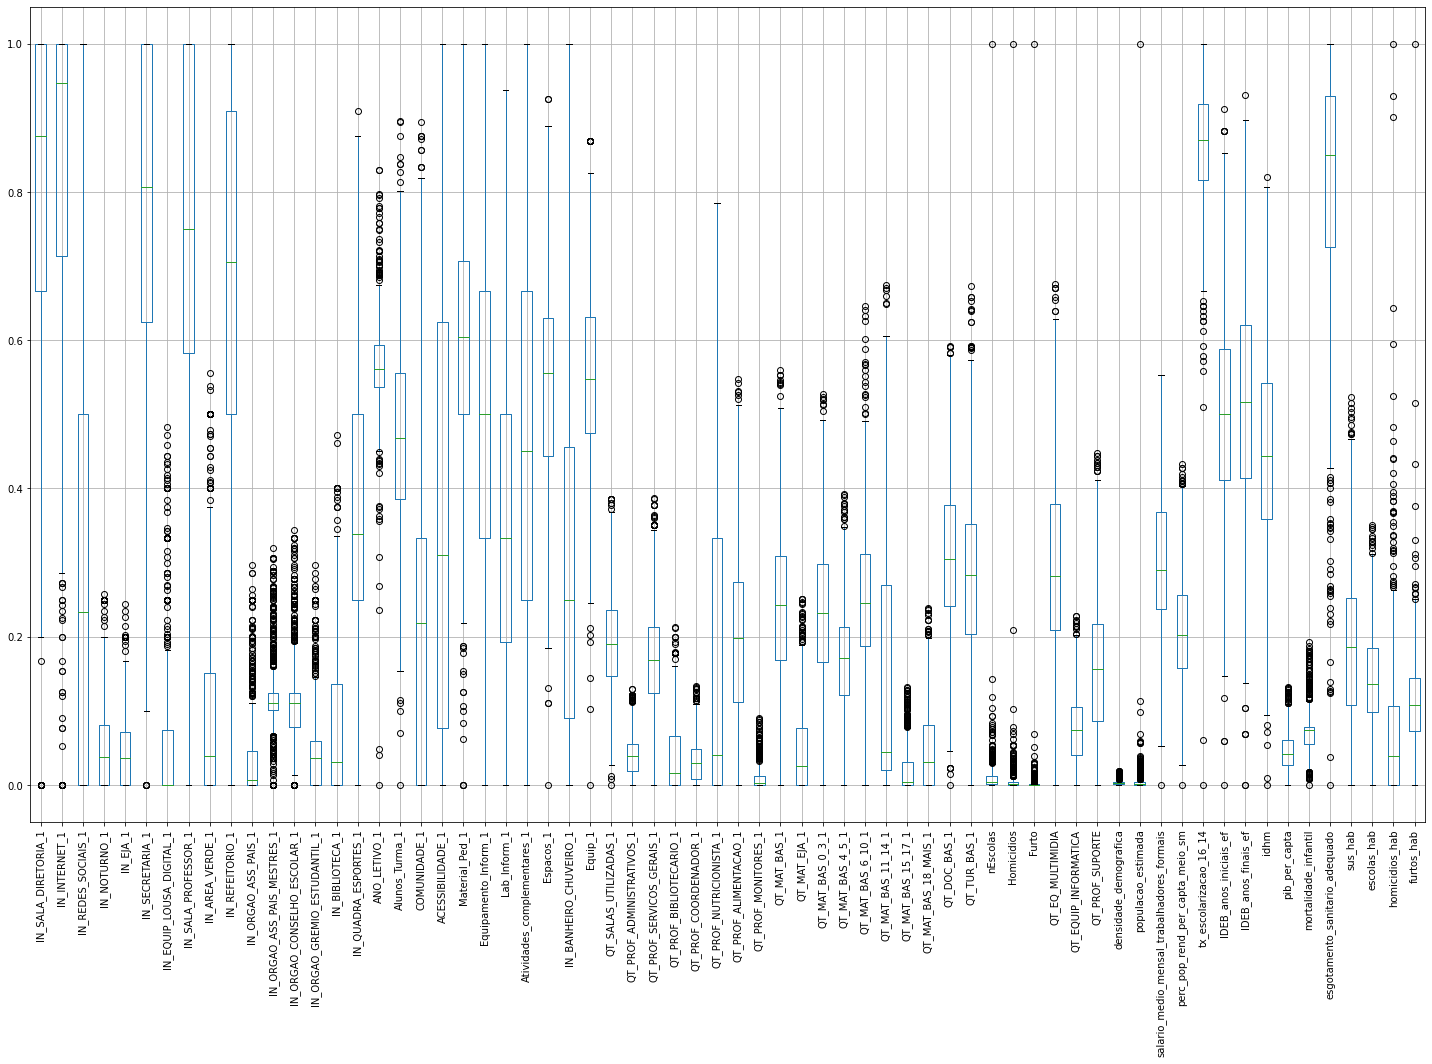

In [8]:
df.boxplot(rot=90, figsize=(25, 15))

In [9]:

cols = df.columns.to_list()

corr_pearson = df[cols].corr()
corr_spearman = df[cols].corr(method='spearman')

corr_nl = corr_spearman[['furtos_hab', 'homicidios_hab']].drop(['Furto', 'Homicidios', 'nEscolas', 'furtos_hab', 'homicidios_hab', 'populacao_estimada'])
corr_l = corr_pearson[['furtos_hab', 'homicidios_hab']].drop(['Furto', 'Homicidios', 'nEscolas', 'furtos_hab', 'homicidios_hab', 'populacao_estimada'])

corr_final = pd.merge(corr_l, corr_nl, left_index=True, right_index=True, suffixes=['_linear', '_non_linear'])

corr_final.sort_values(by='furtos_hab_non_linear')

,furtos_hab_linear,homicidios_hab_linear,furtos_hab_non_linear,homicidios_hab_non_linear
QT_PROF_NUTRICIONISTA_1,-0.162773,-0.034043,-0.167468,-0.168050
tx_escolarizacao_16_14,-0.080768,-0.023573,-0.121907,-0.154094
Equip_1,-0.107151,0.000023,-0.114001,-0.094915
mortalidade_infantil,-0.089538,0.015190,-0.108783,-0.100725
IN_INTERNET_1,-0.014833,0.032607,-0.088368,-0.098638
sus_hab,-0.043028,0.001562,-0.083616,-0.154156
IN_SALA_PROFESSOR_1,-0.058610,-0.008398,-0.078947,-0.099676
IN_REFEITORIO_1,-0.037292,-0.023134,-0.076962,-0.013719
IDEB_anos_finais_ef,-0.072157,-0.072627,-0.073056,-0.100254
IN_SALA_DIRETORIA_1,0.005258,-0.060834,-0.065484,-0.134249


# 3. Regression Tree

<AxesSubplot:xlabel='variable'>

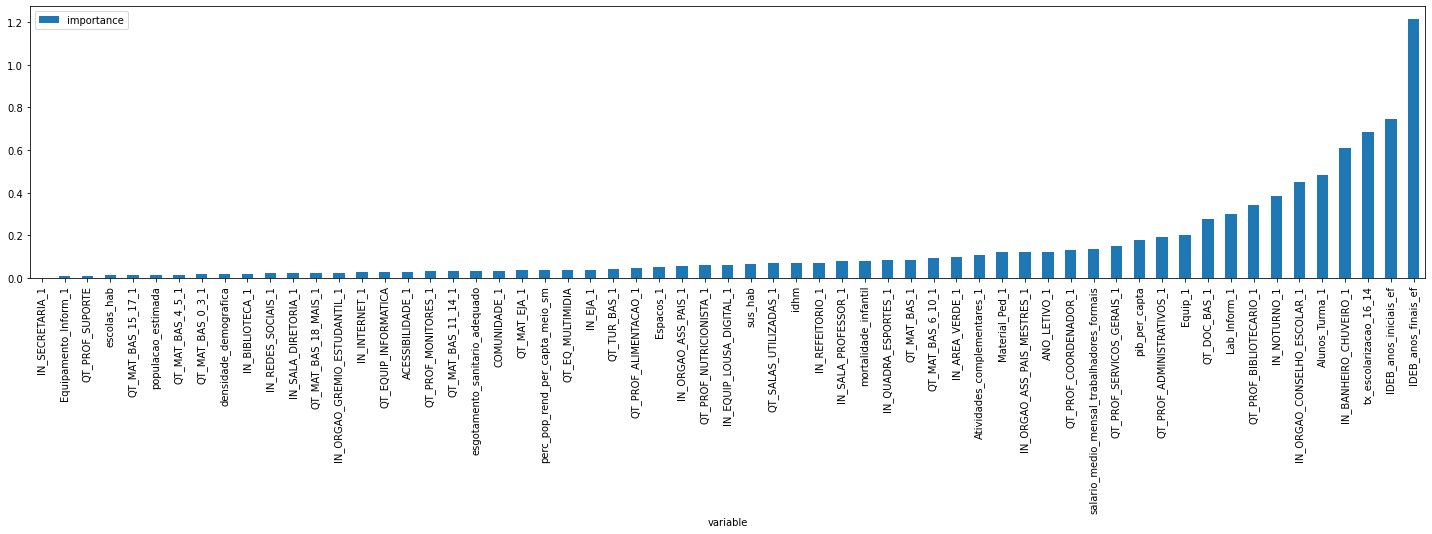

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance


model = DecisionTreeRegressor(criterion='poisson', splitter='random')

cols = df.columns.to_list()
cols.remove('NO_MUNICIPIO')
cols.remove('furtos_hab')
cols.remove('homicidios_hab')
cols.remove('Furto')
cols.remove('Homicidios')
cols.remove('nEscolas')


df_temp = df[cols]


model.fit(df[cols], df['furtos_hab'])

importance = model.feature_importances_

importance_perm = permutation_importance(model, df[cols], df['furtos_hab'], n_repeats=10, random_state=0)

# pd.DataFrame(importance_perm['importances_mean']).plot.bar()
importance_df = pd.DataFrame({'variable': cols, 'importance' : importance_perm['importances_mean'].tolist()})

importance_df[importance_df['importance'] > 0].sort_values(by='importance').plot.bar(x='variable', y='importance', figsize=(25, 5))

<AxesSubplot:xlabel='variable'>

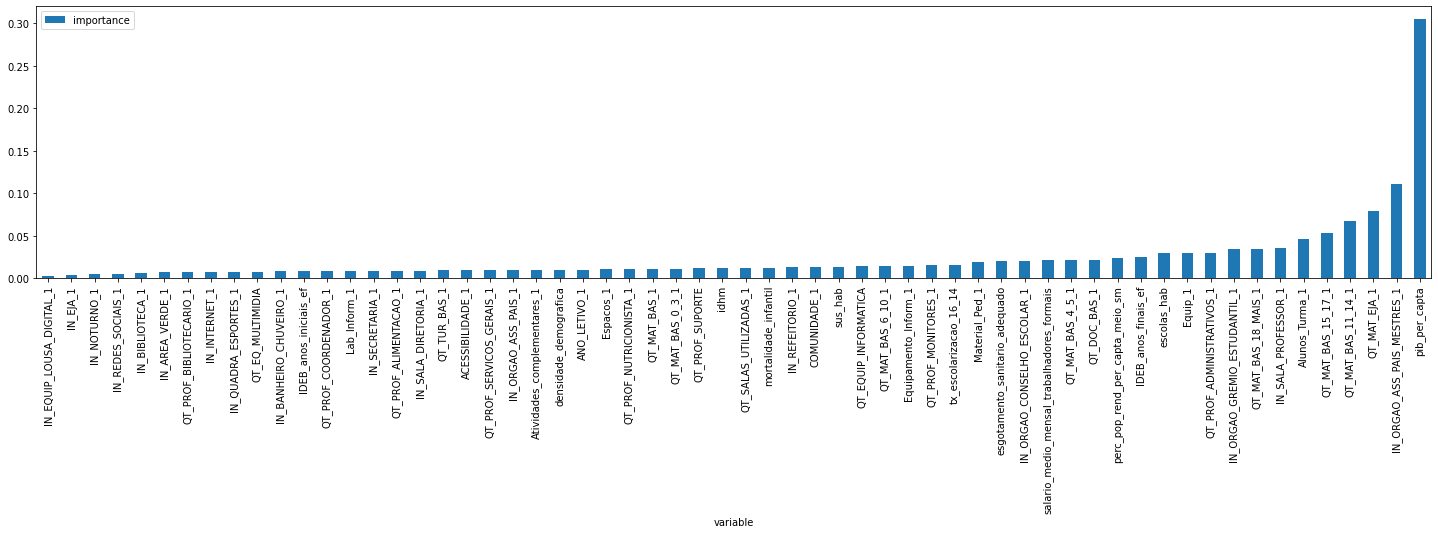

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

cols = df.columns.to_list()
cols.remove('NO_MUNICIPIO')
cols.remove('furtos_hab')
cols.remove('homicidios_hab')
cols.remove('Furto')
cols.remove('Homicidios')
cols.remove('nEscolas')
cols.remove('populacao_estimada')


model.fit(df[cols], df['furtos_hab'])

importance_perm = permutation_importance(model, df[cols], df['furtos_hab'], n_repeats=10, random_state=0)

# pd.DataFrame(importance_perm['importances_mean']).plot.bar()
importance_df = pd.DataFrame({'variable': cols, 'importance' : importance_perm['importances_mean'].tolist()})

importance_df[importance_df['importance'] > 0].sort_values(by='importance').plot.bar(x='variable', y='importance', figsize=(25, 5))